In [2]:
#Practical 1 Up and Down sampling of images
#matplotlib inline
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

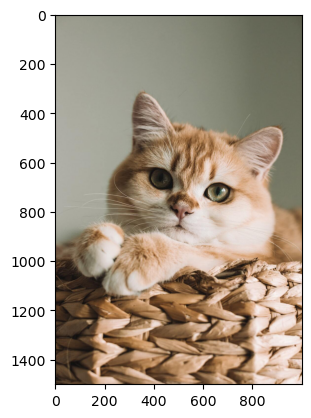

(<matplotlib.image.AxesImage at 0x233c74c36a0>, None)

In [4]:
im = Image.open("image1.jpg") # the original image
pylab.imshow(im), pylab.show()

C:\Users\hariv\AppData\Local\Temp\ipykernel_10280\1437052053.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor,interpolation


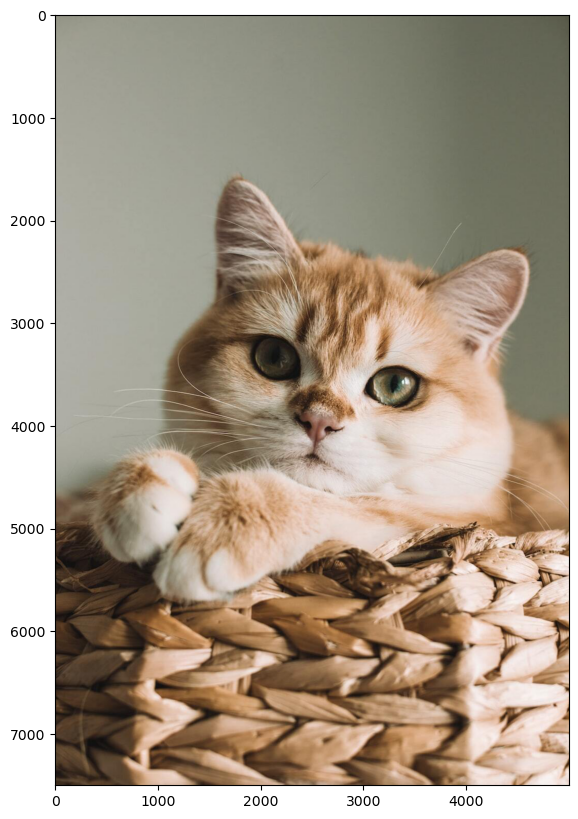

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [6]:
#Upsampling
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor,interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

C:\Users\hariv\AppData\Local\Temp\ipykernel_10280\2160237905.py:1: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) # up-sample with ,bi-linear interpolation


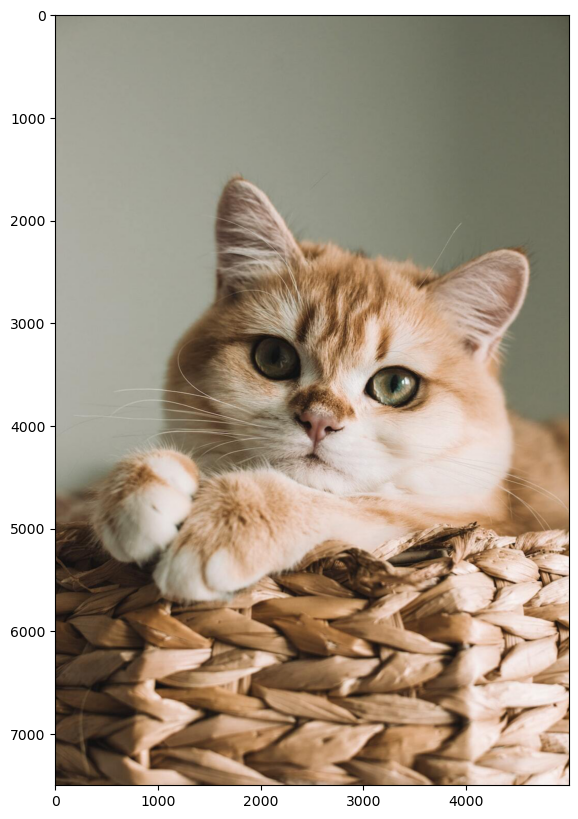

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [7]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) # up-sample with ,bi-linear interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

C:\Users\hariv\AppData\Local\Temp\ipykernel_10280\2612865079.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  im1 = im.resize((im.width*5, im.height*5), Image.BICUBIC) # up-sample with,bi-linear interpolation


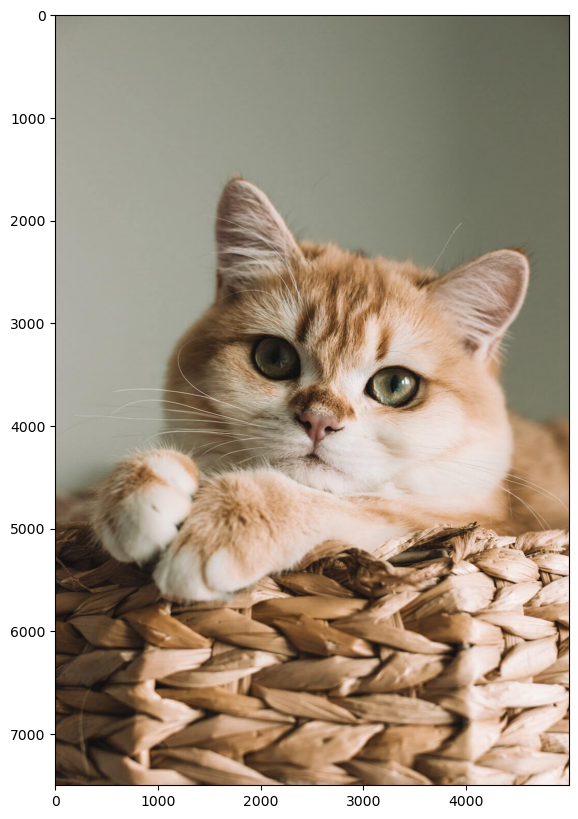

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [8]:
 im1 = im.resize((im.width*5, im.height*5), Image.BICUBIC) # up-sample with,bi-linear interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

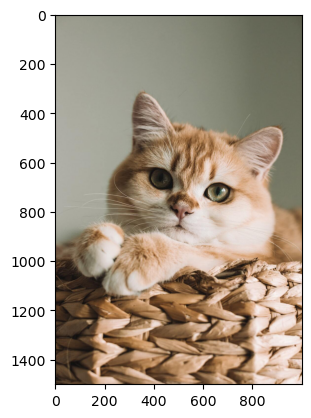

(<matplotlib.image.AxesImage at 0x23386b68700>, None)

In [9]:
#Down-sampling
im = Image.open("image1.jpg")
im.show() # show using photoviewer
pylab.imshow(im), pylab.show()

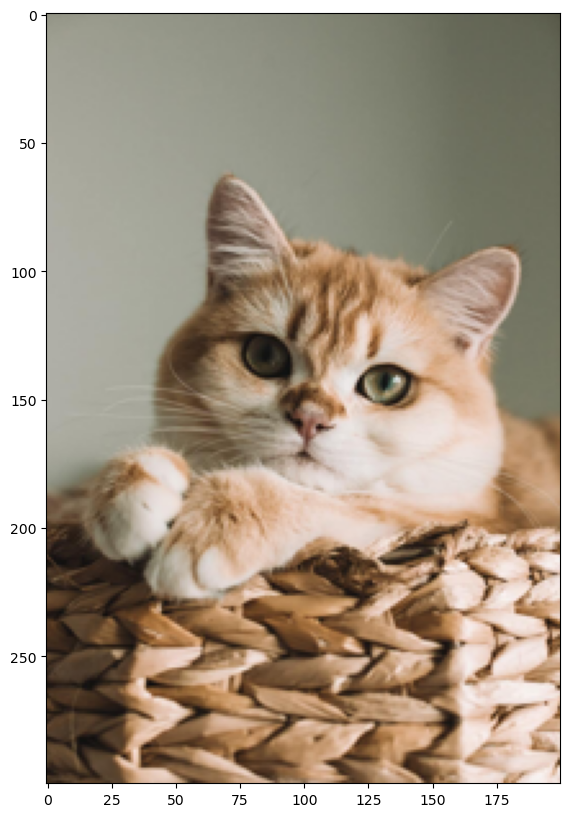

(<Figure size 1500x1000 with 1 Axes>,
 None)

In [10]:
im = Image.open("image1.jpg")
im = im.resize((im.width//5, im.height//5))
pylab.figure(figsize=(15,10)),pylab.imshow(im), pylab.show()

C:\Users\hariv\AppData\Local\Temp\ipykernel_10280\451398020.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)


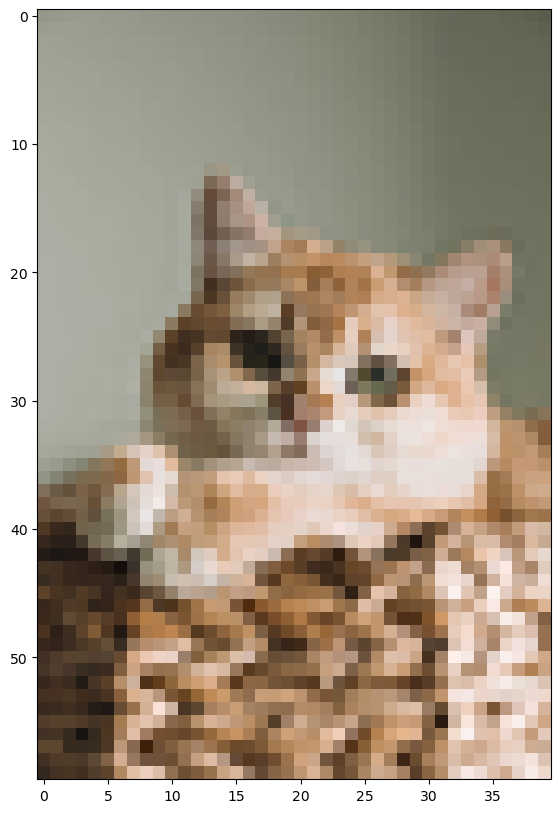

(<Figure size 1500x1000 with 1 Axes>,
 None)

In [11]:
 im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

C:\Users\hariv\AppData\Local\Temp\ipykernel_10280\4082691571.py:7: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=False)


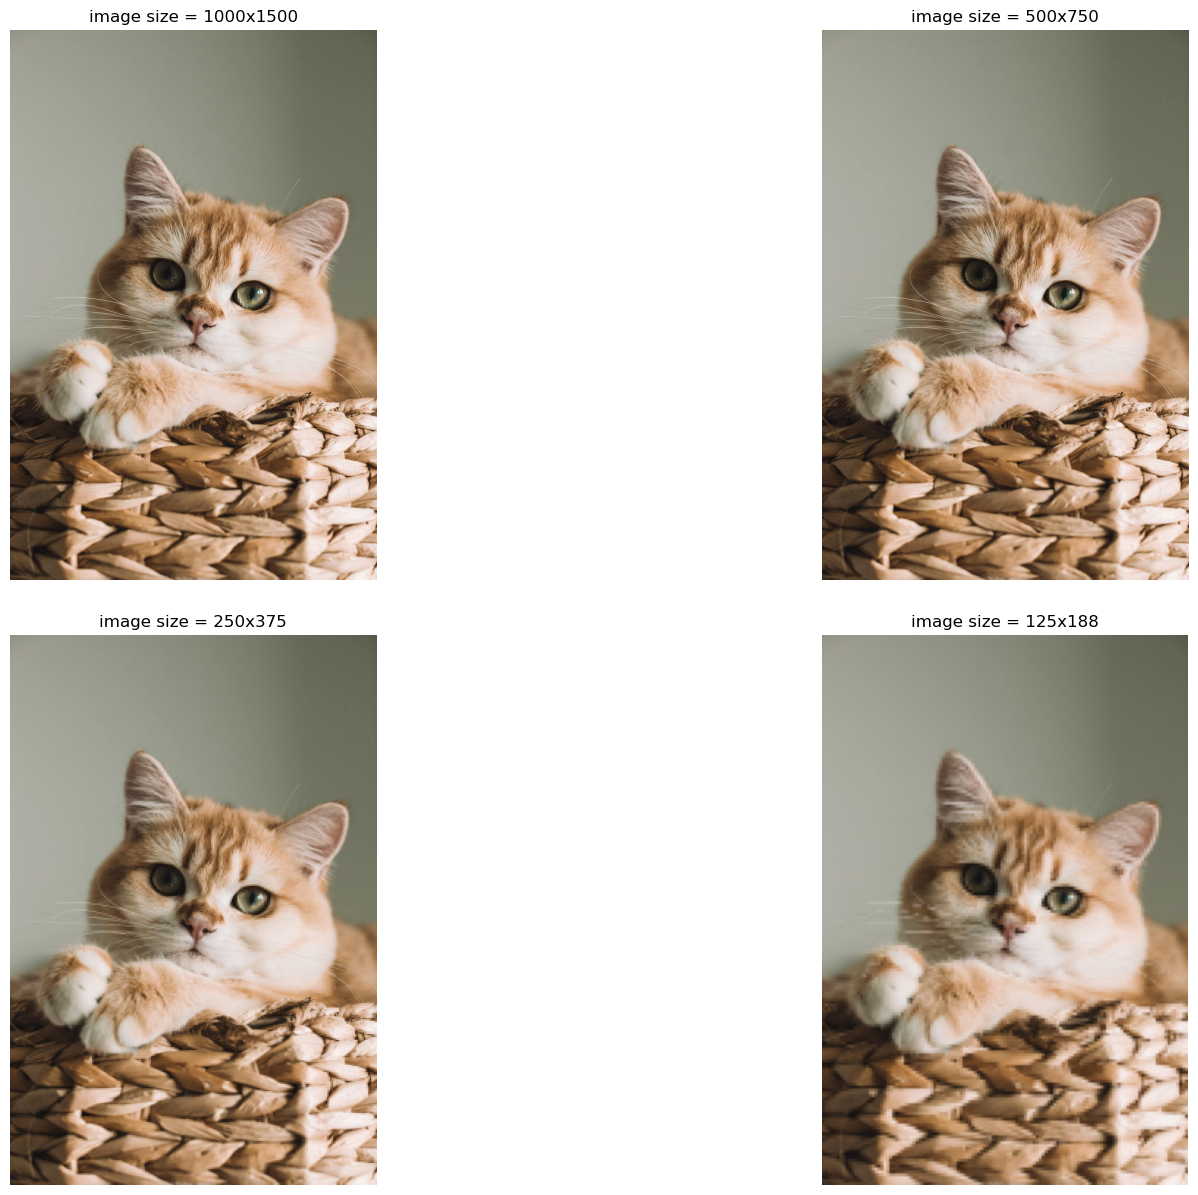

In [17]:
im = imread('image1.jpg')
im1 = im.copy()
pylab.figure(figsize=(20,15))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

In [18]:
 im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=True)

C:\Users\hariv\AppData\Local\Temp\ipykernel_10280\3161444825.py:1: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=True)


C:\Users\hariv\AppData\Local\Temp\ipykernel_10280\4130884445.py:12: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)


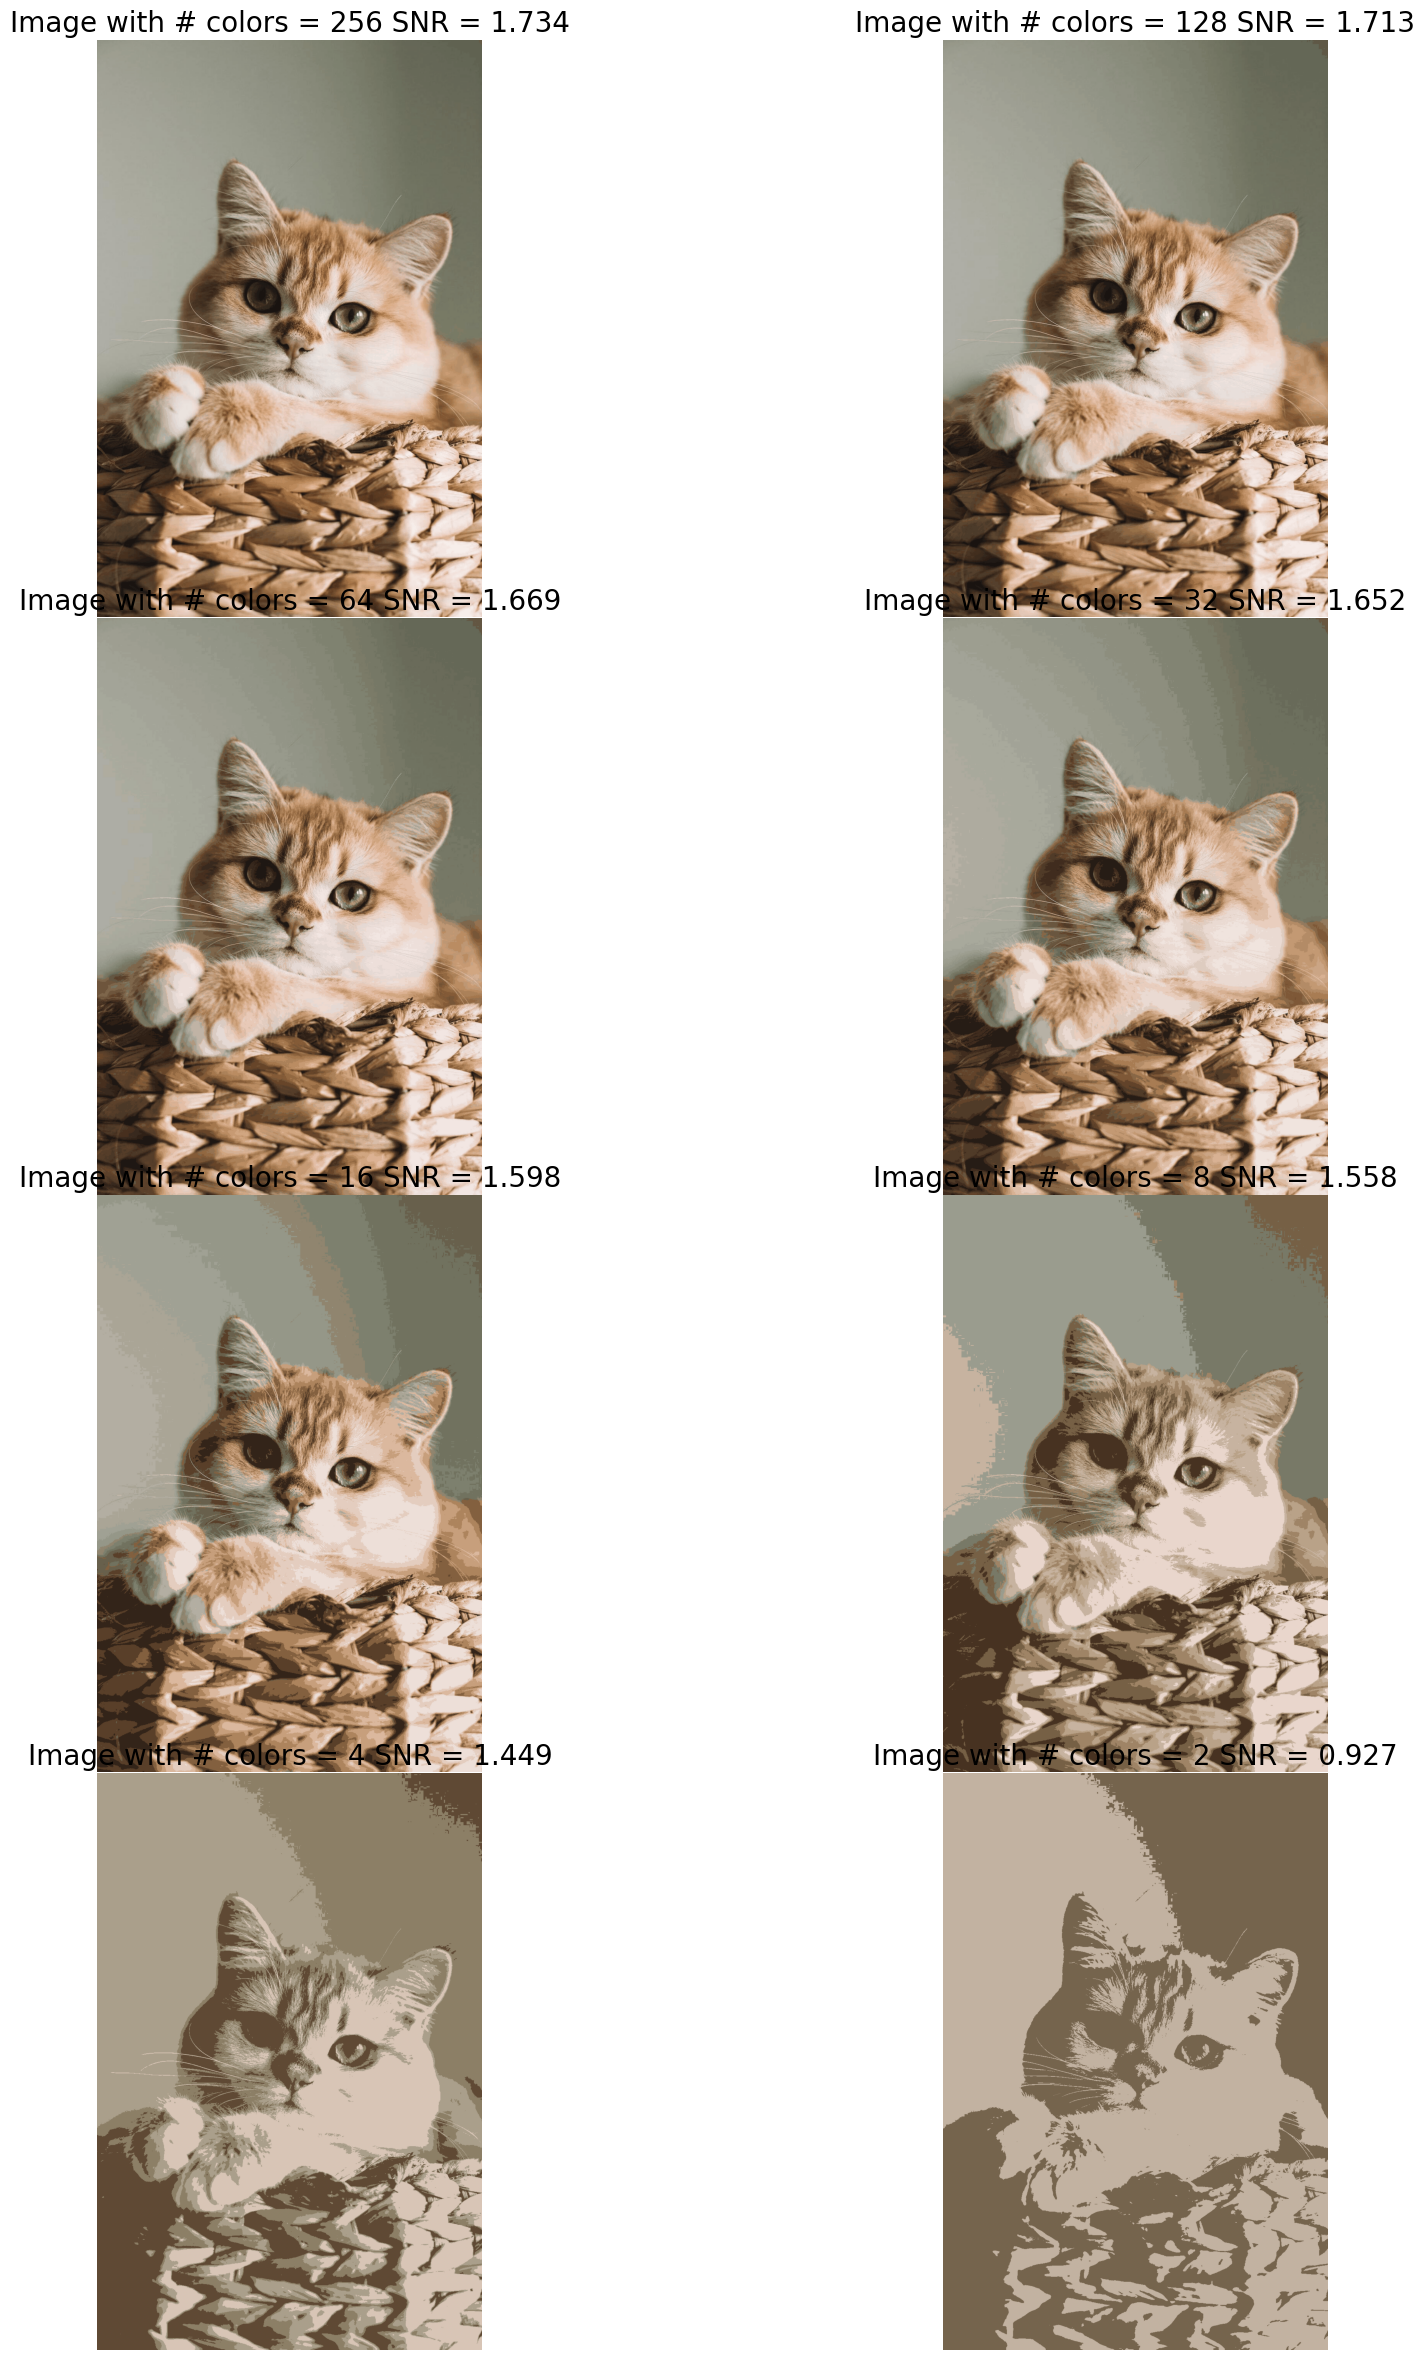

In [21]:
im = Image.open('image1.jpg')
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)
pylab.figure(figsize=(20,30))
num_colors_list = [1 << n for n in range(8,0,-1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
    snr_list.append(signaltonoise(im1, axis=None))
    pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' +
    str(np.round(snr_list[i-1],3)), size=20)
    i += 1
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

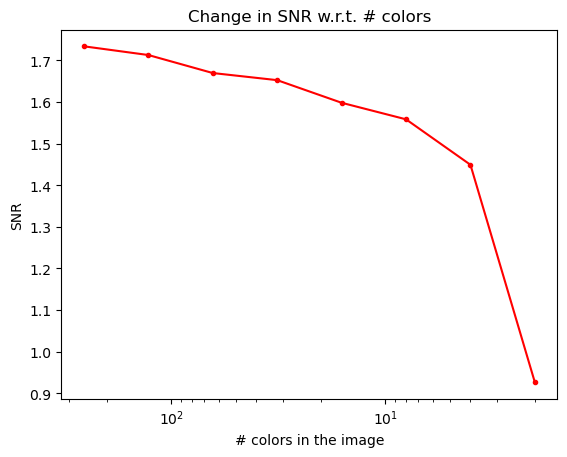

In [23]:
pylab.plot(num_colors_list, snr_list, 'r.-')
pylab.xlabel('# colors in the image')
pylab.ylabel('SNR')
pylab.title('Change in SNR w.r.t. # colors')
pylab.xscale('log')
pylab.gca().invert_xaxis()
pylab.show()